In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline

In [10]:
!ls data

column_names.md
kc_house_data.csv


In [11]:
df = pd.read_csv('data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [12]:
with open('data/column_names.md') as f:
    text = f.read()
print(text)

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the neares

In [13]:
df['price'].min()

78000.0

In [14]:
# Drop all null records involving "view"
# fill all waterfront values with 0, indicating no waterfront
# replace null yr_renovated values with year_built
# There are still "0" values in yr_renovated, we will leave them for now
df = df.dropna(subset=['view'])
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(value=df['yr_built'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21534 non-null  int64  
 11  grade          21534 non-null  int64  
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [15]:
df['sqft_living'].max()

13540

In [16]:
# df['yr_renovated'] = df['yr_renovated'].replace()

In [17]:
train = df
test = df

In [18]:
X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

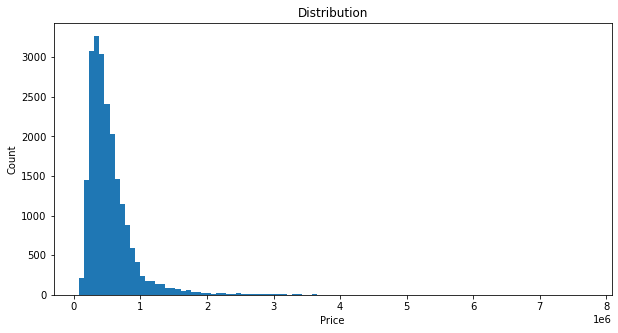

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(y_train, bins=100)
ax.set_xlabel('Price')
ax.set_ylabel('Count')
ax.set_title('Distribution');

In [20]:
y_train.median()

450000.0

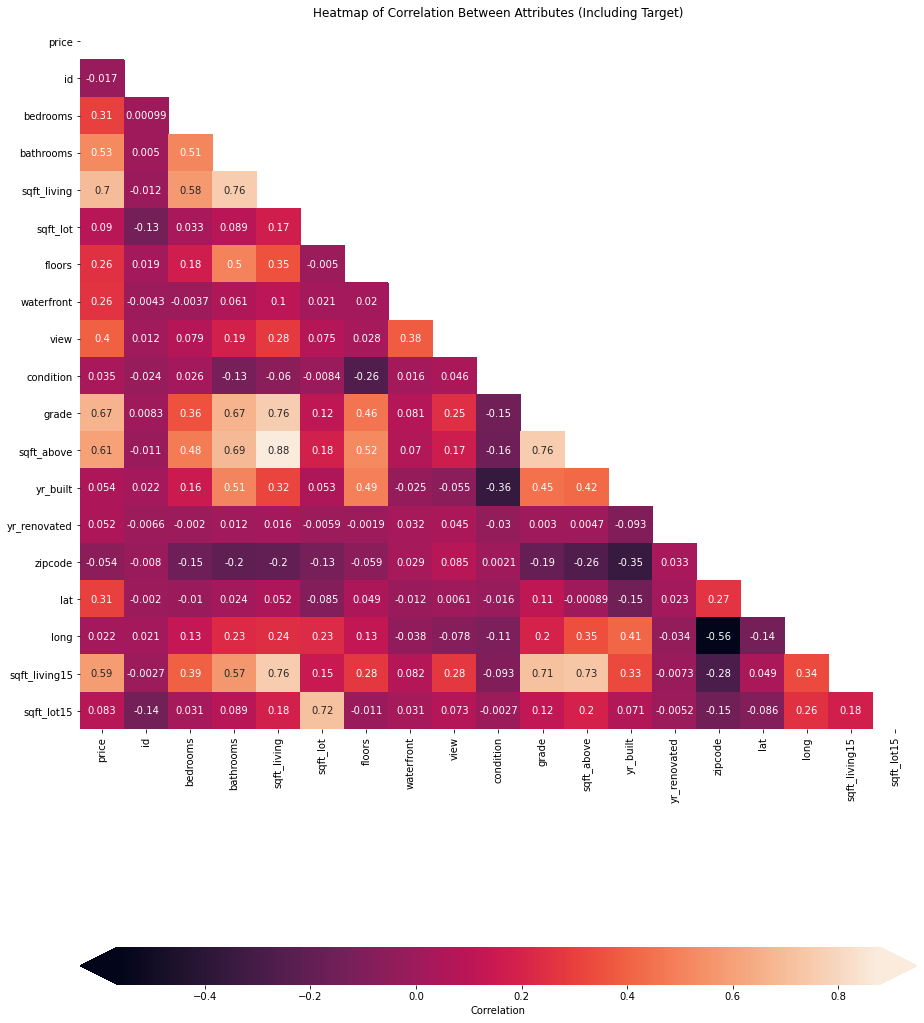

In [21]:
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(15,20))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={'label': 'Correlation', 'orientation': 'horizontal', 'pad': .2, 'extend': 'both'}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [22]:
df_zip = df.groupby('zipcode').mean().sort_values(by=['price'],ascending=False)
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built']
df_zip[columns].head(20)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
zipcode,,,,,,
98039,2.161300e+06,4.060000,3.200000,3800.900000,9.560000,1972.520000
98004,1.358522e+06,3.857595,2.530063,2913.069620,8.693038,1971.522152
98040,1.183231e+06,4.025090,2.709677,3097.265233,8.949821,1971.415771
98112,1.094695e+06,3.507463,2.370336,2494.410448,8.436567,1944.582090
98102,8.996077e+05,3.250000,2.283654,2151.048077,8.298077,1952.163462
98109,8.800778e+05,3.192661,2.158257,2054.779817,8.018349,1944.027523
98105,8.632289e+05,3.580786,2.159389,2150.576419,7.838428,1940.406114
98006,8.601396e+05,3.841046,2.557344,2889.177062,8.794769,1978.704225
98119,8.497148e+05,3.260870,2.224185,2005.614130,8.021739,1947.619565


In [23]:
most_correlated_feature = 'sqft_living'

In [24]:
baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.492320147568959
Validation score: 0.49067739487894757


In [25]:
"""Let's drop 5 features: yr_renovated, condition, (grade should work over both these),
lat, long (should only use one loc variable), and sqft_lot (between this and sqft_living, the latter has better corr).
Also dropping id because it's irrelevant.
"""

"Let's drop 5 features: yr_renovated, condition, (grade should work over both these),\nlat, long (should only use one loc variable), and sqft_lot (between this and sqft_living, the latter has better corr).\nAlso dropping id because it's irrelevant.\n"

In [26]:
X_train_two = X_train.drop(['yr_renovated','condition','long', 'lat','sqft_lot', 'id'], axis=1)
X_train_two

,date,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,10/13/2014,3,1.00,1180,1.0,0.0,0.0,7,1180,0.0,1955,98178,1340,5650
1,12/9/2014,3,2.25,2570,2.0,0.0,0.0,7,2170,400.0,1951,98125,1690,7639
2,2/25/2015,2,1.00,770,1.0,0.0,0.0,6,770,0.0,1933,98028,2720,8062
3,12/9/2014,4,3.00,1960,1.0,0.0,0.0,7,1050,910.0,1965,98136,1360,5000
4,2/18/2015,3,2.00,1680,1.0,0.0,0.0,8,1680,0.0,1987,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,3,2.50,1530,3.0,0.0,0.0,8,1530,0.0,2009,98103,1530,1509
21593,2/23/2015,4,2.50,2310,2.0,0.0,0.0,8,2310,0.0,2014,98146,1830,7200
21594,6/23/2014,2,0.75,1020,2.0,0.0,0.0,7,1020,0.0,2009,98144,1020,2007
21595,1/16/2015,3,2.50,1600,2.0,0.0,0.0,8,1600,0.0,2004,98027,1410,1287


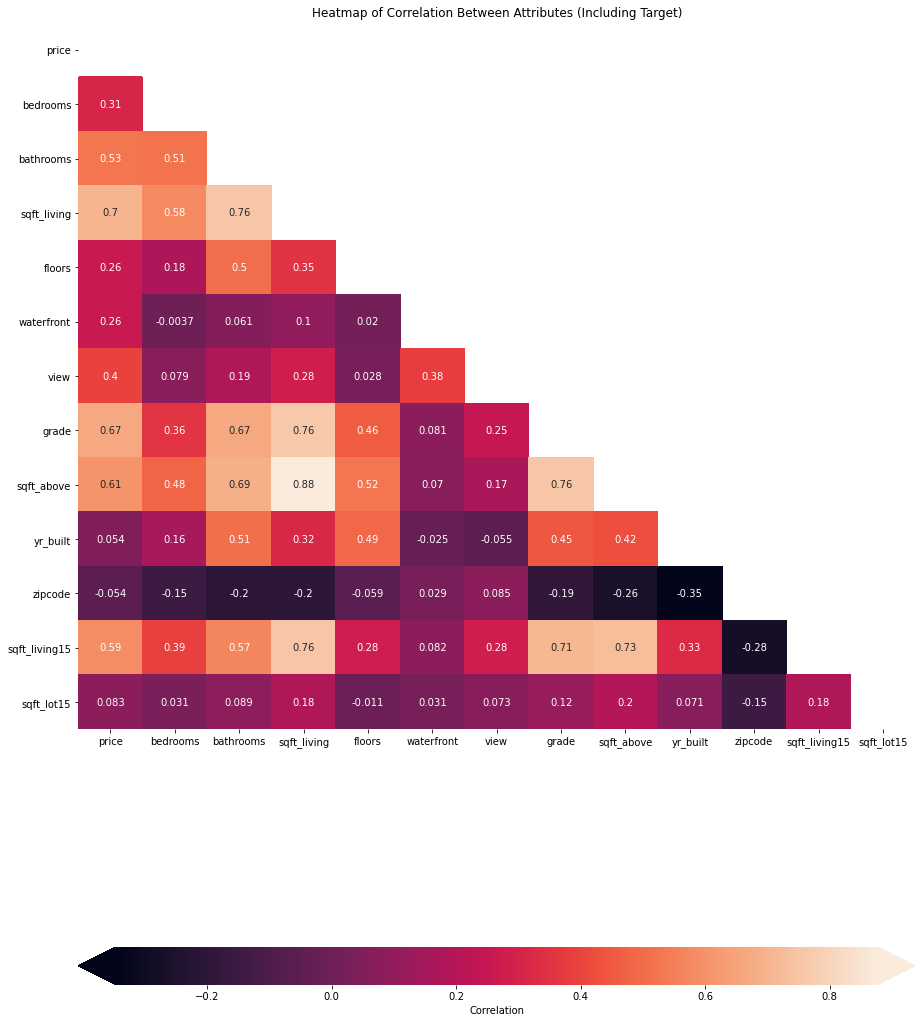

In [27]:
heatmap_data = pd.concat([y_train, X_train_two], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(15,20))

sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={'label': 'Correlation', 'orientation': 'horizontal', 'pad': .2, 'extend': 'both'}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [28]:
"""
Let's drop another few cols...
This time going with bedrooms, bathrooms, floors (should all be replaceable by sqft_living),
sqft_above, sqft_basement (replace with just sqft_living also).
Also dropping sqft_lot15 to remain consistent about using house sqft vs lot sqft.
Dropping date, view
"""

"\nLet's drop another few cols...\nThis time going with bedrooms, bathrooms, floors (should all be replaceable by sqft_living),\nsqft_above, sqft_basement (replace with just sqft_living also).\nAlso dropping sqft_lot15 to remain consistent about using house sqft vs lot sqft.\nDropping date, view\n"

In [29]:
X_train_three = X_train_two.drop(['bedrooms', 'bathrooms', 'floors', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'date', 'view'], axis=1)
X_train_three

,sqft_living,waterfront,grade,yr_built,zipcode,sqft_living15
0,1180,0.0,7,1955,98178,1340
1,2570,0.0,7,1951,98125,1690
2,770,0.0,6,1933,98028,2720
3,1960,0.0,7,1965,98136,1360
4,1680,0.0,8,1987,98074,1800
...,...,...,...,...,...,...
21592,1530,0.0,8,2009,98103,1530
21593,2310,0.0,8,2014,98146,1830
21594,1020,0.0,7,2009,98144,1020
21595,1600,0.0,8,2004,98027,1410


In [30]:
X = df[most_correlated_feature]
y = df['price']

X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=.2,random_state=42)

X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(Y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

#Scaler = StandardScaler()
#X_train = Scaler.fit(X_train).transform(X_train)

model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
model.coef_,model.intercept_,model.score(X_train, Y_train)

(array([275.11242933]), -33400.222370145726, 0.48393292680670863)